In [1]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import torch.nn as nn
import torch.nn.functional as F
from banana_agent import Agent

In [2]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
def DQN(env,max_episodes,epsilon,min_epsilon,decay):

    scores = []                        
    scores2 = deque(maxlen=100)  
                        
    solved = False
    
    for episode in range(1, max_episodes):
        env_info = env.reset(train_mode=True)[brain_name]
        current_state = env_info.vector_observations[0] 
        score = 0
        for t in range(0,500):
            #### Take Actions
            action = agent.act(current_state, epsilon)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0] 
            done = env_info.local_done[0]
            
            #### Update Agent
            agent.step(current_state, action, reward, next_state, done)
            score = score + reward
            current_state = next_state
            
            if done:
                break 
                
        #### Update Scores
        scores2.append(score)
        scores.append(score)
        epsilon = max(min_epsilon, epsilon*decay)
        
        #### Print progress
        print("Not Solved",episode,np.mean(scores2))
        if np.mean(scores2)>=15.0 and not solved:
            solved = True
            print("Solved!!!!!")
            print(episode,np.mean(scores2))
            torch.save(agent.qnetwork_local.state_dict(), 'solution.pth')
    return scores

In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

In [6]:
scores = DQN(env,1000,1,0.01,0.995)

Not Solved 1 0.0
Not Solved 2 0.5
Not Solved 3 0.6666666666666666
Not Solved 4 0.25
Not Solved 5 0.2
Not Solved 6 0.16666666666666666
Not Solved 7 0.0
Not Solved 8 0.0
Not Solved 9 0.1111111111111111
Not Solved 10 0.2
Not Solved 11 0.09090909090909091
Not Solved 12 0.16666666666666666
Not Solved 13 0.07692307692307693
Not Solved 14 0.14285714285714285
Not Solved 15 0.2
Not Solved 16 0.125
Not Solved 17 0.11764705882352941
Not Solved 18 0.1111111111111111
Not Solved 19 0.0
Not Solved 20 -0.05
Not Solved 21 0.0
Not Solved 22 -0.045454545454545456
Not Solved 23 0.0
Not Solved 24 0.0
Not Solved 25 0.04
Not Solved 26 0.038461538461538464
Not Solved 27 0.037037037037037035
Not Solved 28 0.03571428571428571
Not Solved 29 0.034482758620689655
Not Solved 30 0.06666666666666667
Not Solved 31 0.06451612903225806
Not Solved 32 0.03125
Not Solved 33 0.0
Not Solved 34 0.058823529411764705
Not Solved 35 0.02857142857142857
Not Solved 36 0.0
Not Solved 37 0.02702702702702703
Not Solved 38 0.0526315789

Not Solved 363 8.94
Not Solved 364 8.98
Not Solved 365 9.04
Not Solved 366 9.06
Not Solved 367 9.04
Not Solved 368 9.03
Not Solved 369 8.98
Not Solved 370 9.07
Not Solved 371 9.05
Not Solved 372 9.14
Not Solved 373 9.17
Not Solved 374 9.17
Not Solved 375 9.27
Not Solved 376 9.27
Not Solved 377 9.26
Not Solved 378 9.3
Not Solved 379 9.27
Not Solved 380 9.27
Not Solved 381 9.34
Not Solved 382 9.36
Not Solved 383 9.36
Not Solved 384 9.38
Not Solved 385 9.39
Not Solved 386 9.39
Not Solved 387 9.38
Not Solved 388 9.45
Not Solved 389 9.56
Not Solved 390 9.57
Not Solved 391 9.54
Not Solved 392 9.55
Not Solved 393 9.7
Not Solved 394 9.67
Not Solved 395 9.6
Not Solved 396 9.61
Not Solved 397 9.62
Not Solved 398 9.57
Not Solved 399 9.63
Not Solved 400 9.68
Not Solved 401 9.7
Not Solved 402 9.69
Not Solved 403 9.75
Not Solved 404 9.8
Not Solved 405 9.81
Not Solved 406 9.81
Not Solved 407 9.89
Not Solved 408 9.82
Not Solved 409 9.82
Not Solved 410 9.86
Not Solved 411 9.95
Not Solved 412 10.0
Not S

Not Solved 758 13.61
Not Solved 759 13.56
Not Solved 760 13.51
Not Solved 761 13.49
Not Solved 762 13.58
Not Solved 763 13.53
Not Solved 764 13.61
Not Solved 765 13.63
Not Solved 766 13.67
Not Solved 767 13.73
Not Solved 768 13.87
Not Solved 769 13.84
Not Solved 770 13.8
Not Solved 771 13.85
Not Solved 772 13.85
Not Solved 773 13.82
Not Solved 774 13.85
Not Solved 775 13.88
Not Solved 776 13.86
Not Solved 777 13.93
Not Solved 778 13.85
Not Solved 779 13.87
Not Solved 780 13.85
Not Solved 781 13.76
Not Solved 782 13.77
Not Solved 783 13.73
Not Solved 784 13.73
Not Solved 785 13.7
Not Solved 786 13.62
Not Solved 787 13.65
Not Solved 788 13.64
Not Solved 789 13.66
Not Solved 790 13.69
Not Solved 791 13.77
Not Solved 792 13.8
Not Solved 793 13.74
Not Solved 794 13.72
Not Solved 795 13.74
Not Solved 796 13.77
Not Solved 797 13.76
Not Solved 798 13.83
Not Solved 799 13.76
Not Solved 800 13.68
Not Solved 801 13.69
Not Solved 802 13.73
Not Solved 803 13.84
Not Solved 804 13.86
Not Solved 805 1

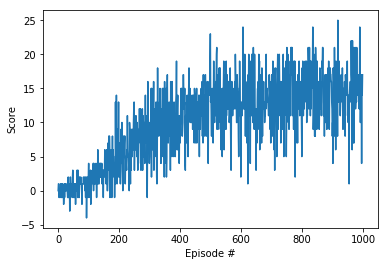

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
plt.savefig('Score_128.png')

<Figure size 432x288 with 0 Axes>